# Compute  PCA : Method 1 : Clustering with Bisecting Kmeans

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/30
- last update : 2023/01/13

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
import sklearn

In [4]:
sklearn.__version__

'1.2.0'

In [5]:
from sklearn.cluster import BisectingKMeans

In [6]:
from astropy.io import fits
import copy

## Start

In [7]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/dagoret/MacOSX/GitHub/LSST/PhotoZ_PhD/Clustering


## Read file

In [8]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [9]:
hdu.info()

Filename: datatools/pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [10]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [11]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [12]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [13]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [14]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [15]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_91313/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

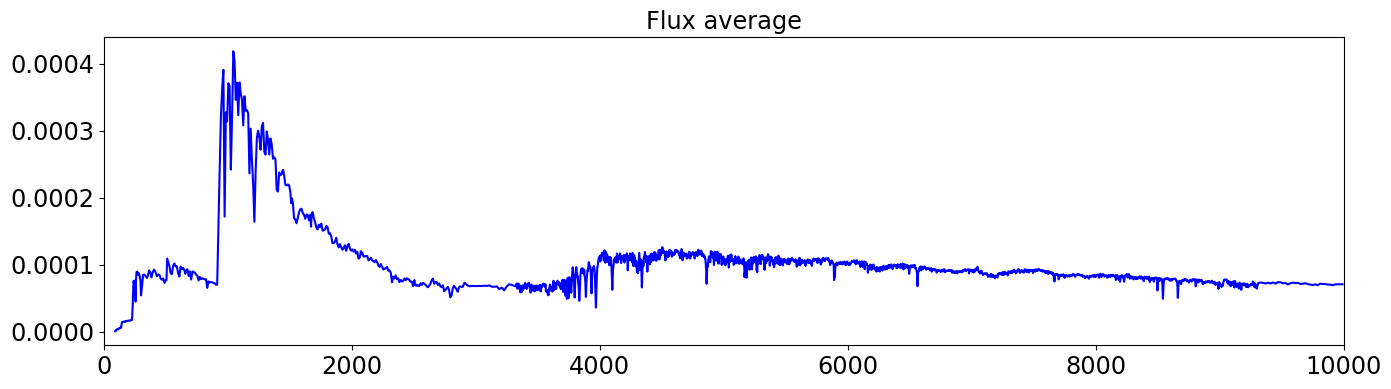

In [16]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

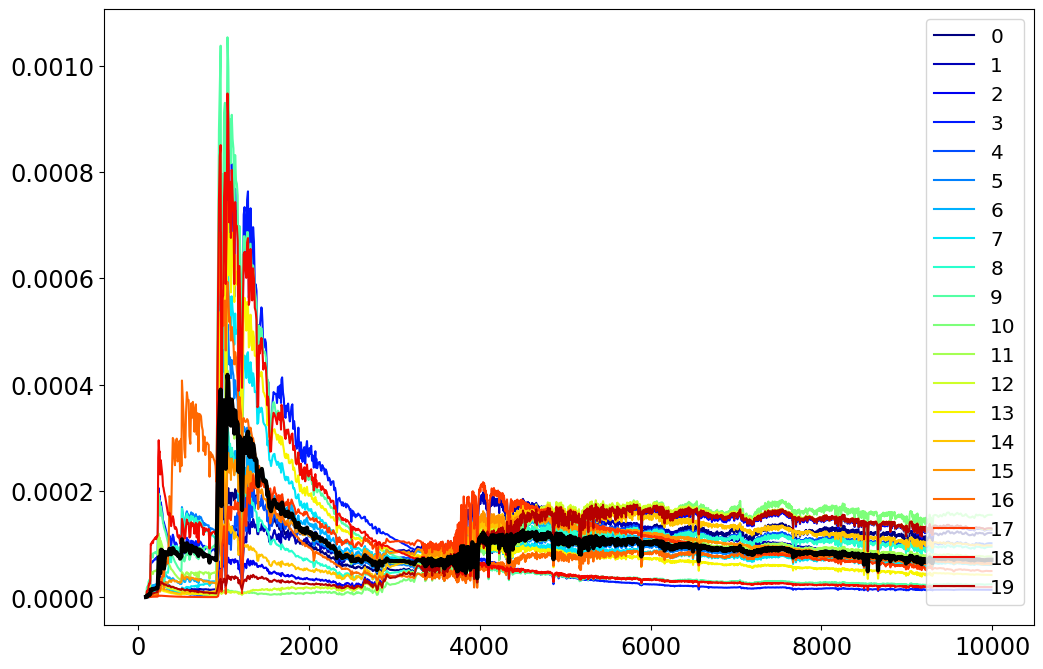

In [17]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering with BisectingKmean

https://scikit-learn.org/stable/modules/clustering.html

## Clustering from PCA coefficients

In [18]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2)

In [19]:
n_clu=30

In [20]:
bm = BisectingKMeans(n_clusters=n_clu, random_state=0).fit(X)


labels = bm.labels_
cluster_centers = bm.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [21]:
print("centroids: ", bm.cluster_centers_)
print("labels: ", bm.labels_)

centroids:  [[ 3.64721648e-03  2.17391506e-04 -1.56030681e-03  4.65997167e-05
  -1.19074429e-04 -5.62603466e-06  3.00945091e-05  2.32063113e-04
  -2.08344342e-05  4.07419475e-05]
 [ 4.04035382e-03 -1.55479903e-03 -5.65684100e-04 -6.24856473e-04
   1.60240448e-04  1.40262279e-04 -1.61073218e-04  1.23071898e-06
  -7.33339230e-05 -3.78519949e-05]
 [ 4.30673828e-03 -8.31519528e-04 -1.01045829e-03  6.41417266e-05
  -2.12963038e-04  1.91282280e-04  7.97893389e-05 -1.40416902e-07
   2.16844583e-05  1.34280977e-05]
 [ 5.20452533e-03 -3.07400063e-04 -4.69179275e-04 -1.50933207e-04
  -3.22317942e-04 -3.02485763e-04 -7.86787237e-05 -3.31494800e-05
  -6.53952224e-05  2.33722694e-07]
 [ 4.16305019e-03  1.29302503e-03  2.48406435e-04  5.19307749e-05
   3.26430978e-05  2.03338952e-05  1.10288860e-06  1.20802903e-04
  -1.71876890e-05  2.14920565e-05]
 [ 4.96131128e-03  6.30260107e-04  5.54000776e-06  9.55711838e-04
   3.67621449e-04 -4.66443484e-05 -3.81820329e-05 -7.86649591e-06
  -2.05581291e-05 -1.

In [22]:
mydict = {i: np.where(bm.labels_ == i)[0] for i in range(n_clusters_)}

In [23]:
mydict

{0: array([140, 141, 188, 380]),
 1: array([ 38,  45,  85, 164, 205, 258, 368, 369, 382]),
 2: array([ 48,  82,  98, 215, 216, 238, 266, 272, 275, 276, 299, 312, 371,
        374, 395, 409, 435, 440, 469, 528, 530, 534, 536, 538, 541, 543,
        544]),
 3: array([  3,   9,  18,  22,  33,  36,  42,  46,  70, 129, 131, 151, 193,
        210, 237, 239, 241, 308, 347, 370, 447, 500, 522, 547]),
 4: array([307, 446, 494]),
 5: array([ 62, 110, 122, 136, 227, 295, 305, 306, 309, 311, 313, 322, 331,
        336, 362, 366, 373, 391, 416, 429, 463, 470, 473, 517, 520, 545]),
 6: array([184, 196, 394, 486, 519]),
 7: array([  5,  16,  95, 103, 109, 117, 127, 132, 213, 217, 244, 267, 338,
        350, 354, 386, 430, 472, 476, 491, 498, 516, 542]),
 8: array([ 26,  34,  54,  55, 120, 177, 185, 189, 209, 211, 281, 290, 291,
        396, 428, 480, 482, 483, 507, 510, 524]),
 9: array([  6,  47,  61,  74,  83, 119, 130, 158, 160, 161, 174, 175, 195,
        202, 383, 415, 437, 438, 443, 455, 460, 5

### Plot Spectra

In [24]:
# n_clu
ncols = 2
nrows = n_clu//ncols 
if n_clu/ncols> nrows:
    nrows+=1

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_91313/1810351138.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


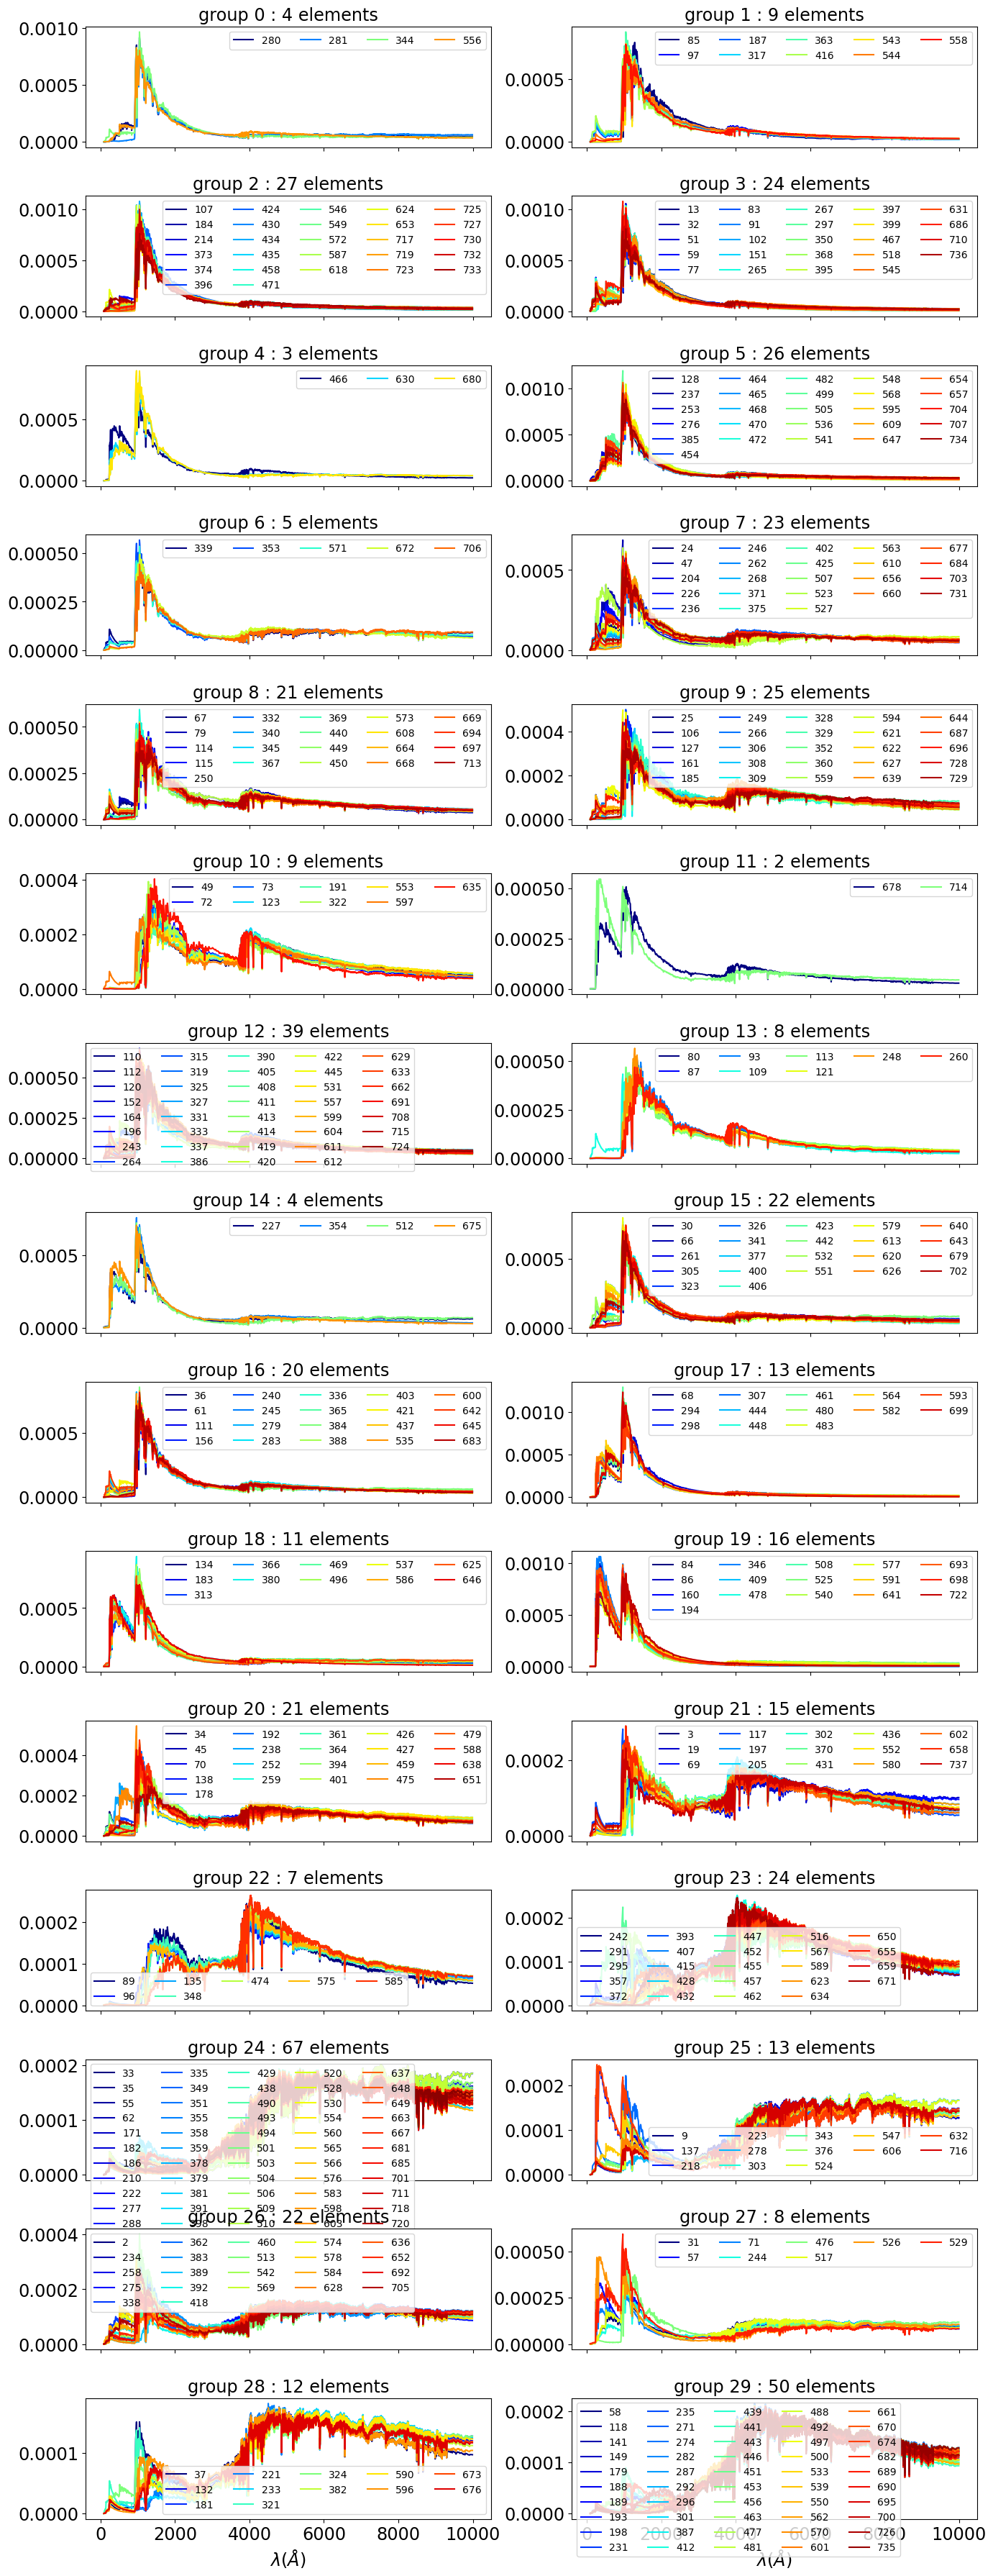

In [27]:
if ncols==2:
    fig = plt.figure(figsize=(16,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==4:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==1:
    fig = plt.figure(figsize=(10,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
else:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
    
    
#axs  = gs.subplots(sharex='col', sharey='row')
axs  = gs.subplots(sharex='col')

for icluster in range(bm.n_clusters):
    
    irow=icluster//ncols
    icol=icluster-irow*ncols
    
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        axs[irow,icol].plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
        
    axs[irow,icol].set_title(f"group {icluster} : {NTOPLOT} elements")
    if irow==nrows-1:
        axs[irow,icol].set_xlabel("$\lambda (\AA)$ ")
    axs[irow,icol].legend(loc="best",ncol=5,fontsize=10)
    
plt.tight_layout()

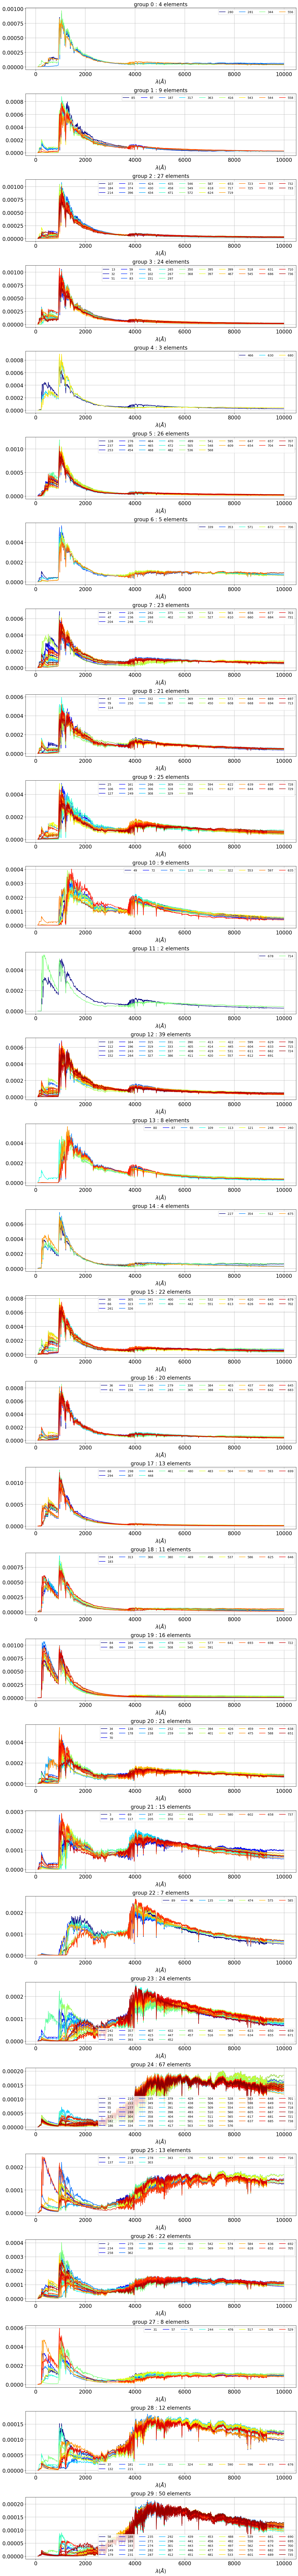

In [26]:
fig = plt.figure(figsize=(14, n_clusters_*4))

for icluster in range(n_clusters_):
    ax=fig.add_subplot(n_clusters_,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
    ax.grid()
        
        
plt.tight_layout()
    
